In [28]:
import os
import logging
from tqdm import tqdm
from PIL import Image

In [29]:
#logging settings
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [30]:
def check_is_dir(path):
    if not os.path.isdir(path):
        raise ValueError(f"Provided path: {path} is not a directory.")
    return True

In [31]:
def filtered_images(list_of_files):
    valid_extensions = {'.jpg', '.jpeg', '.png','.webp'}
    return [file for file in list_of_files if any(file.endswith(ext) for ext in valid_extensions)]

In [32]:
def load_image(image_path):
    image=Image.open(image_path).convert('RGB')
    return image

In [33]:
def read_images_from_dir(dir_path):
    check_is_dir(dir_path)
    files = os.listdir(dir_path)
    image_files = filtered_images(files)
    image_paths = [os.path.join(dir_path, file) for file in image_files]
    images = [load_image(image_path) for image_path in tqdm(image_paths)]
    logging.info(f"Load {len(images)} images from {dir_path}")
    return images

In [34]:
loaded_images=read_images_from_dir("raw_images/bird")

100%|██████████| 229/229 [00:02<00:00, 86.43it/s] 
2024-06-11 09:03:32,472 - INFO - Load 229 images from raw_images/bird


In [35]:
def max_resolution_rescale(image, max_width, max_height):
    width, height = image.size
    if width > max_width or height > max_height:
        ratio = min(max_width/width, max_height/height)
        new_width = int(width * ratio)
        new_height = int(height*ratio)
        image = image.resize((new_width,new_height), Image.LANCZOS)
    return image

In [36]:
max_size = 1024

resized_images = list(map(lambda x: max_resolution_rescale(x,max_size,max_size), tqdm(loaded_images)))

100%|██████████| 229/229 [00:02<00:00, 84.36it/s] 


In [37]:
def min_resolution_filter(image,min_width, min_height):
    width, height = image.size
    return width>= min_width and height>= min_height

In [38]:
min_size = 224
filtered_images = list(filter(lambda x: max_resolution_rescale(x,min_size,min_size), tqdm(resized_images)))

100%|██████████| 229/229 [00:00<00:00, 263.52it/s]


In [39]:
len(filtered_images)

229

In [40]:
import matplotlib.pyplot as plt

In [41]:
def plot_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

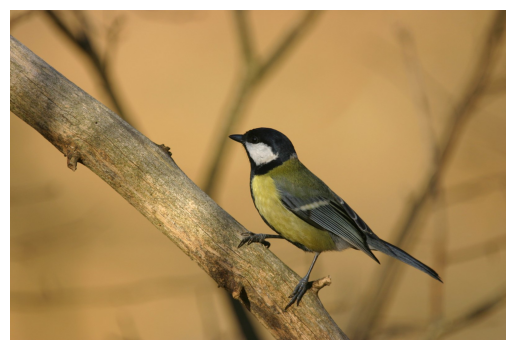

In [42]:
plot_image(filtered_images[14])

In [43]:
def center_crop(image,new_width, new_height):
    width, height = image.size
    left= (width-new_width) / 2
    top = (height-new_height)/2
    right=(width+new_width)/2
    bottom = (height+new_height)/2
    cropped_image = image.crop((left,top,right,bottom))
    logging.info(f"Center cropped image to {new_width}x{new_height}")
    return cropped_image

In [44]:
min_size = 224

2024-06-11 09:04:12,967 - INFO - Center cropped image to 224x224


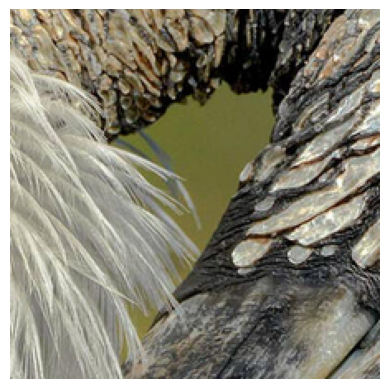

In [51]:
plot_image(center_crop(filtered_images[17], min_size,min_size))

In [46]:
from smartcrop import detect

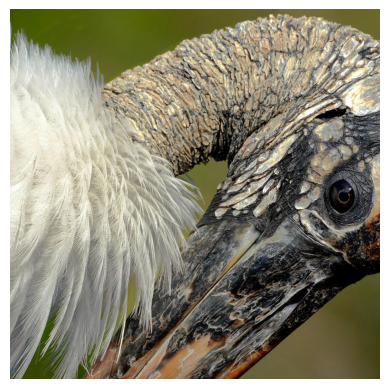

In [50]:
cropped_image = detect(filtered_images[17],square=True)
plot_image(cropped_image)

In [52]:
cropped_images  = list(map(lambda x: detect(x,square=True),tqdm(filtered_images)))

100%|██████████| 229/229 [00:14<00:00, 15.66it/s]
